<a href="https://colab.research.google.com/github/maitreya-v/Transfer-Learning-ResNet50V2-EfficientNetB0/blob/master/Fine_Tuning_EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-07-01 03:50:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 108.177.11.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   175MB/s    in 2.8s    

2023-07-01 03:50:53 (175 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import zipfile

zipref=zipfile.ZipFile("10_food_classes_all_data.zip")
zipref.extractall()
zipref.close()

In [3]:
import tensorflow as tf

train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

train_datagen = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode = "categorical",
    batch_size = 32,
    image_size = (224,224)
)

test_datagen = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode = "categorical",
    batch_size = 32,
    image_size = (224,224)
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [4]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip(mode="horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

Text(0.5, 1.0, 'Augmented Image')

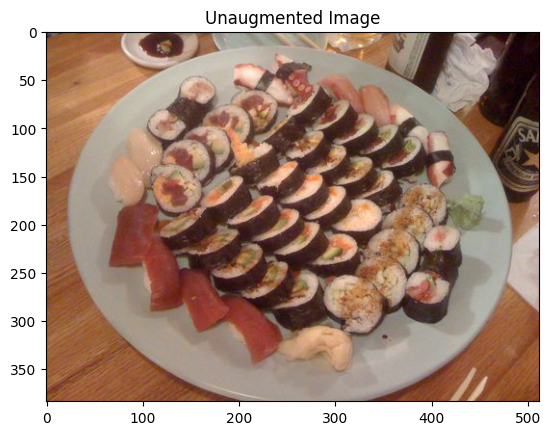

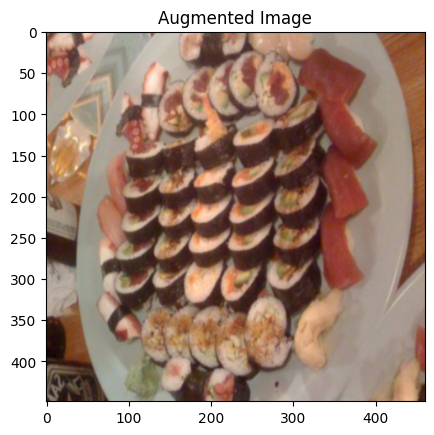

In [5]:
import random
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

dir_path = random.choice(os.listdir(train_dir))
img_path = random.choice(os.listdir(train_dir+"/"+dir_path))
final_img_path = train_dir+"/"+dir_path+"/"+img_path
img = mpimg.imread(final_img_path)/255.
plt.imshow(img)
plt.title("Unaugmented Image")

plt.figure()
augmented_image = data_augmentation(img,training=True)
plt.imshow(augmented_image)
plt.title("Augmented Image")

In [51]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top = False,
    weights = 'imagenet',
)

base_model.trainable = False

In [52]:
inputs = tf.keras.Input(shape=(224,224,3))

x = data_augmentation(inputs)

x = base_model(x,training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model = tf.keras.Model(inputs,outputs)

In [53]:
model.build(input_shape=(224,224,3))

In [54]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, 3)           0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

In [55]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [56]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, 3)           0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

In [57]:
train_datagen.unbatch().take(1).get_single_element()

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[68.07653  , 23.617348 , 14.846939 ],
         [52.80612  , 13.520408 ,  7.2091827],
         [44.357143 , 14.428573 , 12.137755 ],
         ...,
         [13.076523 , 12.076523 , 18.076523 ],
         [10.331628 , 11.331628 , 16.331629 ],
         [ 9.       , 10.       , 15.       ]],
 
        [[89.408165 , 40.790817 , 29.265306 ],
         [59.484695 , 19.20408  ,  9.275509 ],
         [54.015305 , 23.658163 , 19.229593 ],
         ...,
         [12.071428 , 11.071428 , 17.071428 ],
         [10.       , 11.       , 16.       ],
         [ 9.       , 10.       , 15.       ]],
 
        [[85.2704   , 35.12755  , 18.785713 ],
         [67.2704   , 23.168365 ,  9.484691 ],
         [50.714287 , 17.168367 , 11.       ],
         ...,
         [11.       , 10.       , 16.       ],
         [10.       , 11.       , 16.       ],
         [ 9.137748 , 10.137748 , 15.137748 ]],
 
        ...,
 
        [[20.214264 , 20.214264 

In [58]:
test_datagen.unbatch().take(1).get_single_element()[0].shape

TensorShape([224, 224, 3])

In [59]:
history = model.fit(
    train_datagen,
    epochs = 5,
    steps_per_epoch = len(train_datagen),
    validation_data = test_datagen,
    validation_steps = len(test_datagen)
)

Epoch 1/5
235/235 [==============================] - 54s 186ms/step - loss: 1.0201 - accuracy: 0.7073 - val_loss: 0.4547 - val_accuracy: 0.8740
Epoch 2/5
235/235 [==============================] - 37s 153ms/step - loss: 0.6156 - accuracy: 0.8115 - val_loss: 0.3746 - val_accuracy: 0.8856
Epoch 3/5
235/235 [==============================] - 37s 156ms/step - loss: 0.5388 - accuracy: 0.8307 - val_loss: 0.3476 - val_accuracy: 0.8912
Epoch 4/5
235/235 [==============================] - 34s 144ms/step - loss: 0.5001 - accuracy: 0.8413 - val_loss: 0.3320 - val_accuracy: 0.8948
Epoch 5/5
235/235 [==============================] - 35s 145ms/step - loss: 0.4745 - accuracy: 0.8531 - val_loss: 0.3146 - val_accuracy: 0.8996


In [60]:
model.evaluate(test_datagen)

79/79 [==============================] - 6s 72ms/step - loss: 0.3146 - accuracy: 0.8996


[0.3146198093891144, 0.8996000289916992]

In [61]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False
print(len(base_model.trainable_variables))

10


In [62]:
model.compile(
    loss="categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [63]:
for layer in model.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f75570afb50> True
<keras.engine.sequential.Sequential object at 0x7f76080f43a0> True
<keras.engine.functional.Functional object at 0x7f75287054e0> True
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f7556d64d60> True
<keras.layers.core.dense.Dense object at 0x7f75570870d0> True


In [64]:
history2=model.fit(
    train_datagen,
    epochs = 10,
    initial_epoch = 5,
    steps_per_epoch = len(train_datagen),
    validation_data=test_datagen,
    validation_steps=len(test_datagen)
)

Epoch 6/10
235/235 [==============================] - 52s 170ms/step - loss: 0.4326 - accuracy: 0.8596 - val_loss: 0.2972 - val_accuracy: 0.8988
Epoch 7/10
235/235 [==============================] - 38s 158ms/step - loss: 0.3789 - accuracy: 0.8777 - val_loss: 0.2975 - val_accuracy: 0.9012
Epoch 8/10
235/235 [==============================] - 38s 158ms/step - loss: 0.3378 - accuracy: 0.8895 - val_loss: 0.2950 - val_accuracy: 0.9024
Epoch 9/10
235/235 [==============================] - 35s 146ms/step - loss: 0.3072 - accuracy: 0.8989 - val_loss: 0.2807 - val_accuracy: 0.9100
Epoch 10/10
235/235 [==============================] - 35s 147ms/step - loss: 0.2848 - accuracy: 0.9089 - val_loss: 0.2795 - val_accuracy: 0.9084


In [65]:
model.evaluate(test_datagen)

79/79 [==============================] - 6s 72ms/step - loss: 0.2795 - accuracy: 0.9084


[0.2794886529445648, 0.9083999991416931]

In [66]:
for num,layer in enumerate(model.layers):
  print(num,layer.name,layer.trainable)

0 input_6 True
1 sequential True
2 efficientnetb0 True
3 global_average_pooling2d_2 True
4 dense_2 True


In [ ]:
def plot_histories(history):
  loss=history.history["loss"]
  accuracy=history.history["accuracy"]

  val_loss=history.history["val_loss"]
  val_accuracy=history.history["val_accuracy"]
  epochs = tf.range(0,5)
  plt.plot(x=epochs,y=loss,label="Training Loss")
  plt.plot(x=epochs,y=accuracy,label="Training Accuracy")

  plt.figure()
  plt.plot(x=epochs,y=val_loss,label="Training Loss")
  plt.plot(x=epochs,y=val_accuracy,label="Training Accuracy")